# Access to modern cooking solutions

The questions related to the access to modern cooking solutions are in the **section I** of the quesitonaire. 

The main challeng is to provide all households access to cooking solutions that are clean, efficient, convinient, affordable, safe and available. 

In Rwanda, a high percentage of households still use highly polluting stoves, and a very low percentage use clean fuel.

##### Data and librairies 

In [1]:
# Preliminaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from IPython.display import Image
import os,sys

SRC_PATH = '../../src/'
sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), SRC_PATH)))

from plot_utils import *
from plot_utils import VARIATION, RED_COLORS

In [2]:
main = pd.read_excel('../../Rwanda/raw_data/main.xlsx')
section_I = pd.read_csv('../../Rwanda/raw_data/csv/I.csv')

# This might not be necessary
codebook_I = pd.read_excel('../../Rwanda/references/codebook.xlsx', sheet_name= 'Section I')

n_households = len(main)

## Health and Safety 

For this section, we are focusing on safety and health related  to the questions I31_(1 to 8).

In the case of Rwanda, three different categories are considered:
- Major injury (death, permanent health damage, burns/fire/poisoning, severe cough or respiratory problem)
- Minor injury (e.g., watery eyes)
- No accidents

Households where major injury has occurred are ranked in **Tier 3**, otherwise in **Tier 5**.

The question for the evaluation of the Tier is **I31**: "In the last 12 months, what type of harm/injury did your household face from this cookstove?"

**Remark**[Naomi] In the report, it seems that the World consideres only injuries from the **primary** cookstove. One should check how to get this out of the data

--> I.3 : In the last 12 months, which cookstove did your household use for preparing meals (up to 5 listed).

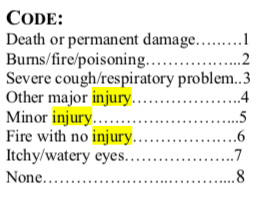

In [3]:
Image("../../Rwanda/references/cooking_injuries.png")

There are therefore 8 options for this (multiple choice) question, which are coded as **I31_1, ...,I31_8** in the database. Let us create a list of labels for this.

In [4]:
# Type of harm/injuries in the table
safety_questions_code = ['I31_'+str(k) for k in range(1,9)]


In [5]:
# Note: we can get the total number of answers per categoty from the 'codebook'
choices_id = []
choices_count = []
choices_label = []
for index,row in codebook_I.iterrows():
    if 'I31' in row['Variable']:
        choices_id.append(int(row['Variable'].replace('I31_','')))
        choices_count.append(row['Obs'])
        choices_label.append(row['Label'].replace(row['Variable']+'_',''))

total = sum(choices_count)
print("Statistics according to cookstoves ")
for l in range(0,len(choices_label)):
    print(choices_label[l]," = ",choices_count[l]," (", round(choices_count[l]/total*100,2),"%)")



Statistics according to cookstoves 
Death or permanent damage  =  1  ( 0.03 %)
Burns/fire/poisoning  =  45  ( 1.24 %)
Severe cough/respiratory problem  =  29  ( 0.8 %)
Other major injury  =  8  ( 0.22 %)
Minor injury  =  78  ( 2.14 %)
Fire with no injury  =  25  ( 0.69 %)
Itchy/watery eyes  =  5  ( 0.14 %)
None  =  3447  ( 94.75 %)


**Remark**: To get the data **per household** we have to go throught the database using the HHID key

In [6]:
# Check the number of household
n_household = len(np.unique(section_I["HHID"]))
section_I_HHID = section_I.groupby(['HHID']).sum()

# Let's add the type of habitat to the section I so we can separate according to rural/Urban info. 
injuries_df = pd.DataFrame.from_dict({'habitat': main['habitat'],'HHID': np.unique(section_I["HHID"])})
injuries_df
for i in safety_questions_code:
    injuries_df[i] = np.array(section_I_HHID[i])

    
injuries_df

,habitat,HHID,I31_1,I31_2,I31_3,I31_4,I31_5,I31_6,I31_7,I31_8
0,urban,1102020811001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,urban,1102020811002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,urban,1102020811003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
3,urban,1102020811004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,urban,1102020811005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
5,urban,1102020811006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
6,urban,1102020811007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
7,urban,1102020811008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
8,urban,1102020811009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
9,urban,1102020811010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [7]:

# now we can calculate the results for total sample, urban and rural habitat using the same function
total_injuries = get_multiple_choice_values(injuries_df,safety_questions_code)
urban_injuries = get_multiple_choice_values(injuries_df.loc[injuries_df['habitat']=='urban'],safety_questions_code)
rural_injuries = get_multiple_choice_values(injuries_df.loc[injuries_df['habitat']=='rural'],safety_questions_code)

print('total',total_injuries)
print('urban',urban_injuries)
print('rural',rural_injuries)

total {'major_accident': 2.4582701062215477, 'minor_accident': 3.1866464339908953, 'no_accident': 93.71775417298937}
urban {'major_accident': 1.4722536806342015, 'minor_accident': 1.1325028312570782, 'no_accident': 96.82899207248018}
rural {'major_accident': 2.682313495389774, 'minor_accident': 3.93964794635373, 'no_accident': 92.62363788767813}


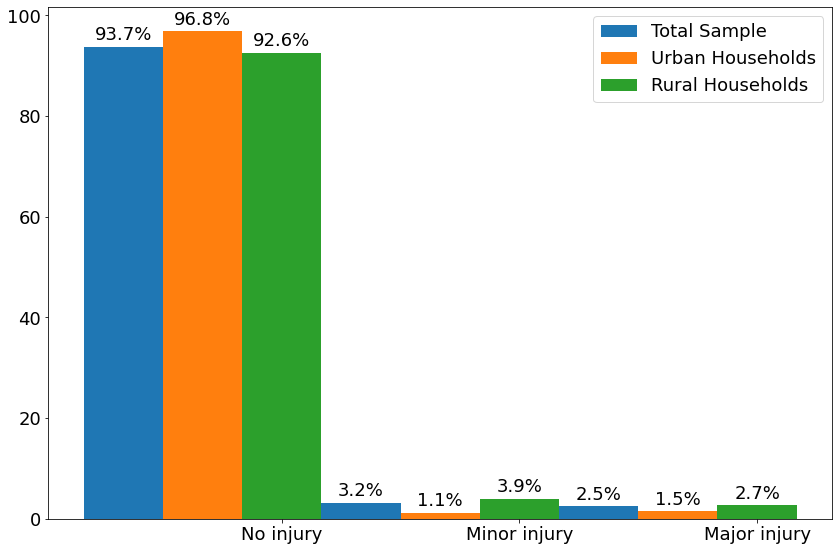

In [8]:
# grouped bar chart
x_labels = ['No injury','Minor injury','Major injury']
bars_data = [
    {
        'label': 'Total Sample',
        'data': [total_injuries['no_accident'],total_injuries['minor_accident'],total_injuries['major_accident']]
    },
    {
        'label': 'Urban Households',
        'data': [urban_injuries['no_accident'],urban_injuries['minor_accident'],urban_injuries['major_accident']]
    },
    {
        'label': 'Rural Households',
        'data': [rural_injuries['no_accident'],rural_injuries['minor_accident'],rural_injuries['major_accident']]
    },
    
    
]

plot_bars(x_labels,bars_data,length=12,height=8,add_autolabel=True)



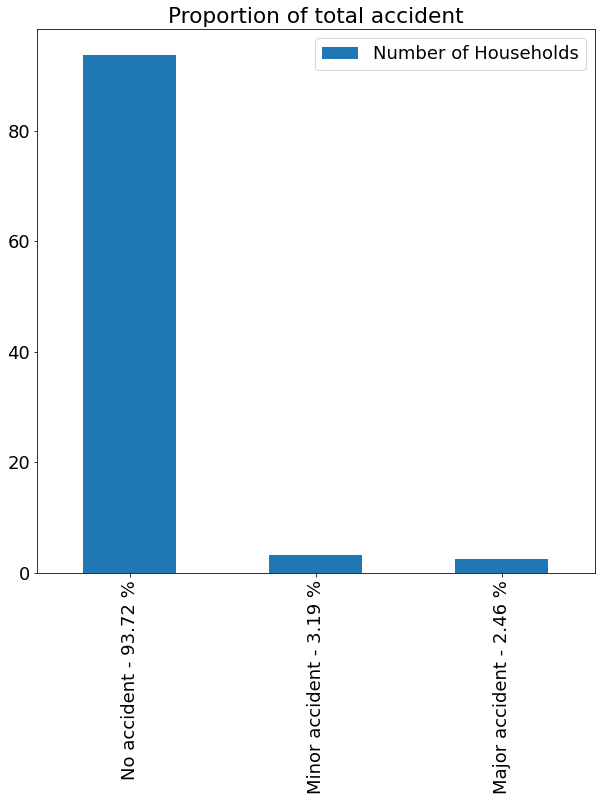

In [9]:
percent = [total_injuries['no_accident'], total_injuries['minor_accident'],total_injuries['major_accident']] 
index = ['No accident', 'Minor accident', 'Major accident']
pie_ = pd.DataFrame({'Number of Households': percent},
                  index = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(index, percent)])

pie_.plot.bar(y ='Number of Households', figsize=(10, 10), title = 'Proportion of total accident')


### Results 
- 2.5% of households are ranked in Safety Tier 3 (in the Rwanda Report: 2.2%)
- 97.5% of households are ranked in Safety Tier 5

#### Per Habitat:
- MTF urban Tier 3 : 1.2% - here: 1.48%
- MTF rural Tier 3 : 2.1% - here: 2.70%